# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Bartosz Lipiński, 413177
    2. Serjoscha Bender, 344493
    3. Filip Gruczka, 413279

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [1]:
# Your code:
import pandas as pd
import numpy as np

def cat_pop_density(value):
    if value >= 5824:
        return "very high"
    elif value >= 4368:
        return "high"
    elif value >= 2912:
        return "medium"
    elif value >= 1456:
        return "low"
    else:
        return "very low"
    

data = pd.read_csv("population_density.csv")
seed = 413177
data = data.sample(frac=0.9, random_state=seed)
pop_density = data["population_density"].tolist()
data["population_density_categorical"] = [cat_pop_density(x) for x in pop_density]
data.to_csv("population_density_categorical.csv", index=False)


## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

Whiskers for temperature:  [243.39, 310.07]
The lowest value after cleaning: 243.39


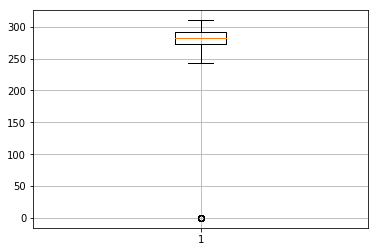

In [13]:
# Your code:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


data = pd.read_csv('population_density_categorical.csv')

# find whiskers
plotTemp = data.boxplot(column=["temperature"], return_type="dict")
#plotTemp=plt.boxplot(data['temperature'])
tempWhiskers=[item.get_ydata()[1] for item in plotTemp['whiskers']]

a,b=tempWhiskers
print("Whiskers for temperature: ", tempWhiskers)

# remove outliers
filter = (data['temperature'] >= a) & (data['temperature'] <= b)
dataFiltered=data.loc[filter]  
dataFiltered.to_csv('population_density_categorical_cleaned.csv',index=False)

dataCleaned = pd.read_csv('population_density_categorical_cleaned.csv')
plt.boxplot(dataCleaned['temperature'])
print("The lowest value after cleaning:",min(dataCleaned['temperature']))


   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [6]:
# Your code:
from scipy import stats

original = data["temperature"]
cleaned = dataCleaned["temperature"]
cleaned_features = [np.median(cleaned), np.mean(cleaned), stats.mode(cleaned).mode[0]]
original_features = [np.median(original), np.mean(original), stats.mode(original).mode[0]]

stat_features = pd.DataFrame([original_features, cleaned_features], index=["original","cleaned"], columns=["Median", "Mean", "Mode"])
print(stat_features)
print("The only value that has changed is Mean. It has decreased by 0.64832 ")

          Median        Mean    Mode
original  282.49  281.203621  274.15
cleaned   282.49  281.268453  274.15
The only value that has changed is Mean. It has decreased by 0.64832 


   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [7]:
# Your code:
print("The number of rows before removing the outliers: ",len(data.index))
print("The number of rows after removing the outliers: ",len(dataCleaned.index))
print(len(data.index)-len(dataCleaned.index)," rows have been removed.")

The number of rows before removing the outliers:  43384
The number of rows after removing the outliers:  43374
10  rows have been removed.


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

Minimal mean population density on: Columbus Day 
Maximal mean population density on: New Years Day


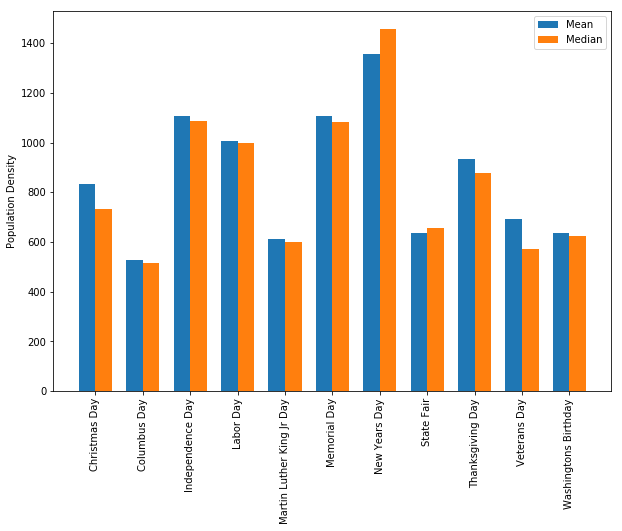

In [14]:
# Your code:
grouped = data[data["holiday"] != "None"].groupby("holiday")
mean = grouped.mean().reset_index()
median = grouped.median().reset_index()

plt.figure(figsize=(10,7))
ind = np.arange(len(mean))
width = 0.35
plt.bar(ind - width/2, mean['population_density'], width, label="Mean")
plt.bar(ind + width/2, median['population_density'], width, label="Median")
plt.xticks(range(len(mean)), mean['holiday'], rotation="vertical")
plt.ylabel('Population Density')
plt.legend()

min_pop_density = mean.iloc[mean["population_density"].idxmin()]["holiday"]
max_pop_density = mean.iloc[mean["population_density"].idxmax()]["holiday"]
print("Minimal mean population density on:", min_pop_density,
     "\nMaximal mean population density on:", max_pop_density)





   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

Text(0.5,1,'temperature distribution in the cleaned dataset')

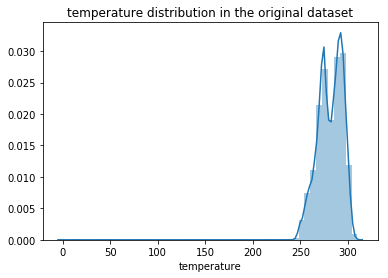

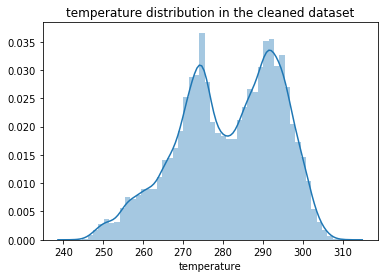

In [17]:
# Your code:
import seaborn as sns
sns.distplot(data["temperature"])
plt.title('temperature distribution in the original dataset')
plt.figure()
sns.distplot(dataCleaned["temperature"])
plt.title('temperature distribution in the cleaned dataset')


   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

The frequency of the data is the highest when population_density is between 0-500 
and temperature is in the range of 270-295


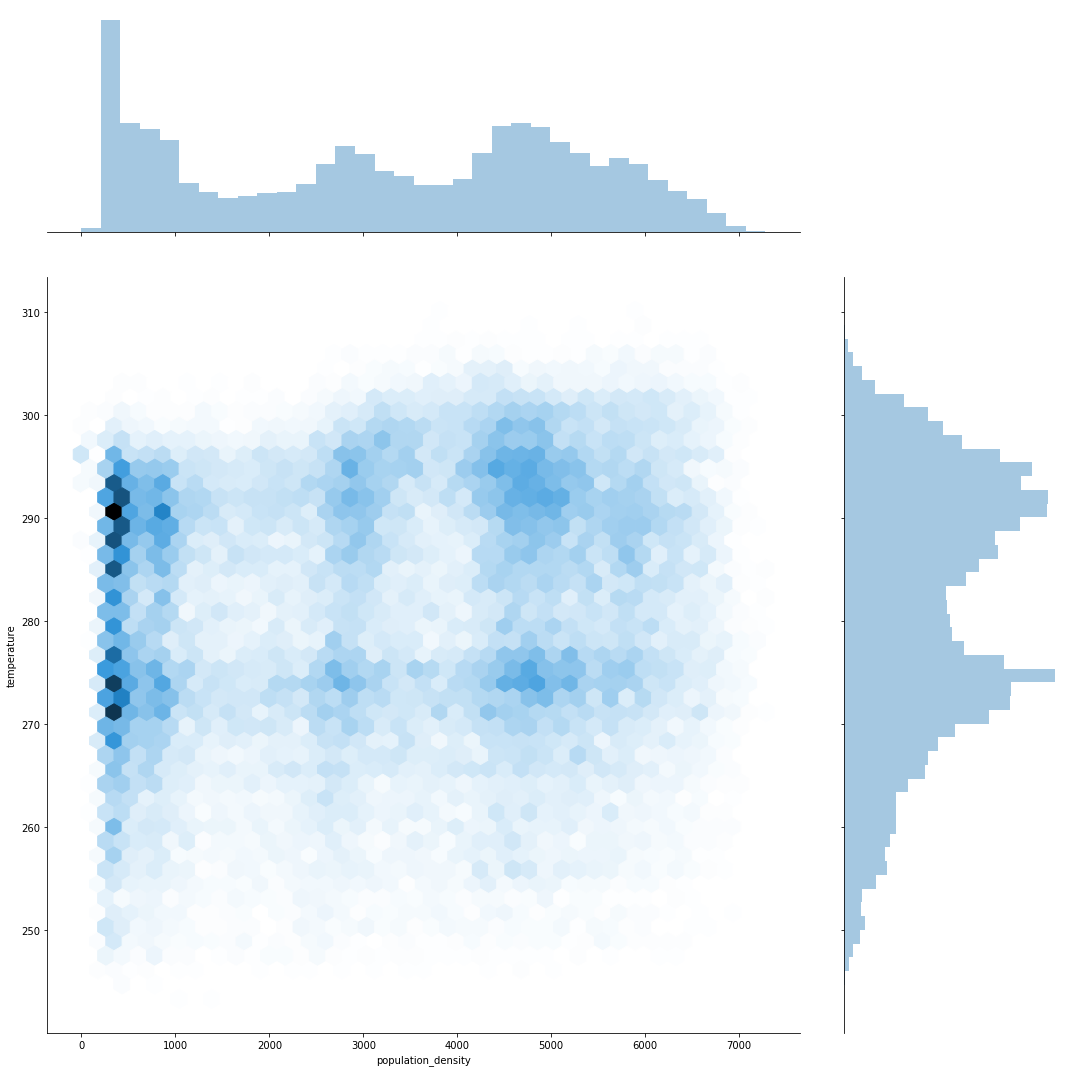

In [18]:
# Your code:
bDistData=pd.DataFrame(dataCleaned, columns=['temperature', 'population_density'])
sns.jointplot(y='temperature', x='population_density',data=bDistData, kind="hex",height=15, ratio=3)
print("The frequency of the data is the highest when population_density is between 0-500 \n"
      +"and temperature is in the range of 270-295")


## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [21]:
# Your code:
def cat_temperature(value, lower, upper):
    if value >= upper:
        return "high"
    elif value <= lower:
        return "low"
    else:
        return "medium"

temp = dataCleaned["temperature"].tolist()
q3 = np.percentile(temp, 75)
q1 = np.percentile(temp, 25)

dataCleaned["temperature_categorical"] = [cat_temperature(t, q1, q3) for t in temp]


   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

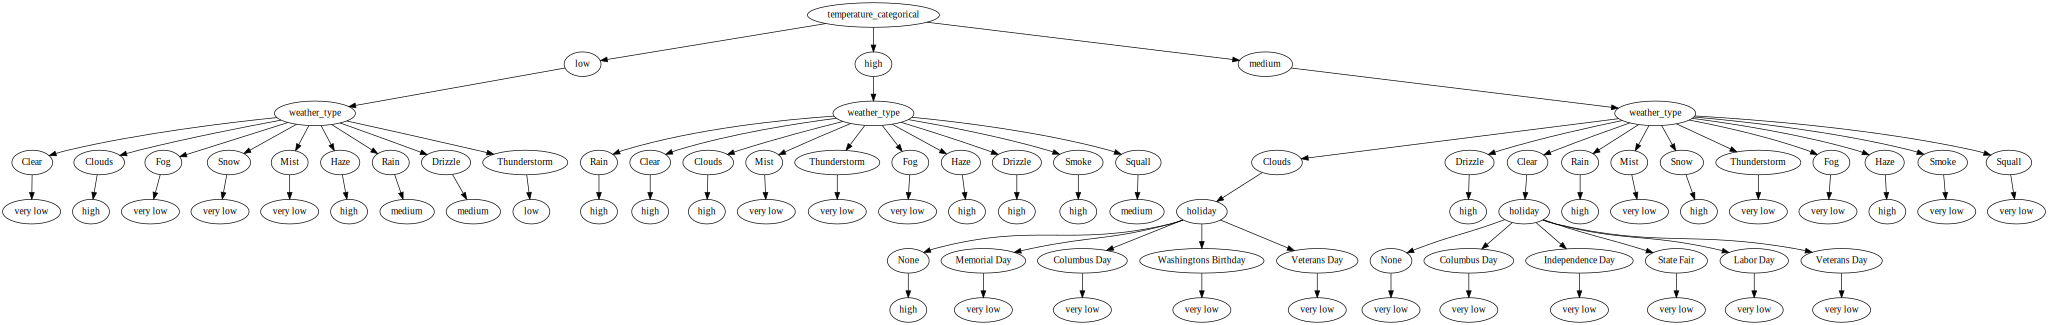

System entropy:  2.2308630280978035


In [23]:
# Your code:
from p_decision_tree.DecisionTree import DecisionTree

columns = dataCleaned.columns
descriptive_features = ["holiday", "temperature_categorical", "weather_type"]
target_feature = "population_density_categorical"

data_descriptive = dataCleaned[descriptive_features].values
data_target = dataCleaned[target_feature].values

decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features, data_target.tolist(), "entropy")
decisionTree.id3(0,5000)

dot = decisionTree.print_visualTree( render=False )

# When using Jupyter
display( dot )

print("System entropy: ", format(decisionTree.entropy))


   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

Explanation: 

The best attribute is "weather_type", as the id3 algorithm of the decision tree is configured to select the splitting attributes based on entropy.


## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [35]:
# Your code:
data = pd.read_csv("population_density_categorical.csv")

target_feature = "population_density"
descriptive_features = ["holiday", "temperature", "rain_1h", "snow_1h", "clouds_percentage", "date_time"]

q3_data = data[descriptive_features + [target_feature]].copy()
q3_data["date_time"] = q3_data["date_time"].transform(lambda x: int(x.split(" ")[1].split(":")[0]))



   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation:

Temperature, rain_1h, snow_1h and cloud_percentage are diretly suitable for the use with linear regression as they are continuous, numerical value.

Holiday is a categorical value and therefore has to be modified in order to be used.

The date_time in numerical hour representation is technically usable for linear regression. But that does not take into account that the clock is a circle and the hour 0 is the direct successor of hour 23. It will create a discontinuity between these hours if we use date_time as a numerical feature. But if we think of it as a categorical feature, this again does not adequately model the ordering of the hours of a day.


   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

Explanation:

For holiday we use one hot encoding as there is no ordering of the possible value. This creates a column for every possible value of holiday.

For date_time we introduce two new columns, modelling the hour of the day with a continuous periodic function:

time_sin = sin(2\*PI\*hour/24), time_cos = cos(2\*PI\*hour/24)

These will be used for regression instead of the hour value.


In [40]:
# Your code:
q3_data = pd.get_dummies(q3_data)
q3_data["time_sin"] = q3_data["date_time"].transform(lambda x: np.sin(2*np.pi*x/24))
q3_data["time_cos"] = q3_data["date_time"].transform(lambda x: np.cos(2*np.pi*x/24))

display(q3_data.head(2))


,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,time_sin,time_cos
0,266.22,0.0,0.0,1,2,726,0,0,0,0,0,0,0,1,0,0,0,0,0.5,0.866025
1,294.36,0.0,0.0,90,22,2039,0,0,0,0,0,0,0,1,0,0,0,0,-0.5,0.866025


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

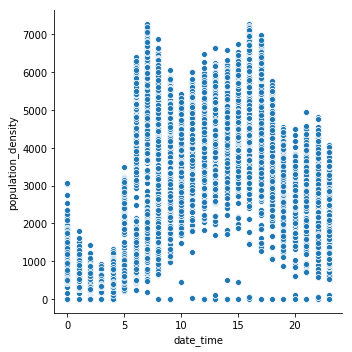

In [28]:
# Your code:
sns.relplot(x="date_time", y="population_density", data=q3_data);


   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [42]:
# Your code:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

corr = q3_data.corr()      # showing correlations by target variable
print(corr['population_density'].sort_values(ascending=False))

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in split.split(q3_data, q3_data["date_time"]):
    RegA = q3_data.loc[test_index]

    
RegB=q3_data.sample(frac=0.4,random_state=42)

RegA.head()
RegA.to_csv('RegA.csv',index=False)
RegB.to_csv('RegB.csv',index=False)


population_density                   1.000000
date_time                            0.351248
temperature                          0.131426
clouds_percentage                    0.067498
holiday_None                         0.043694
rain_1h                              0.005022
snow_1h                              0.000385
holiday_Independence Day            -0.010421
holiday_New Years Day               -0.011279
holiday_Memorial Day                -0.011638
holiday_Christmas Day               -0.013125
holiday_Columbus Day                -0.013222
holiday_Labor Day                   -0.013358
holiday_Thanksgiving Day            -0.013780
holiday_Veterans Day                -0.013887
holiday_Washingtons Birthday        -0.014191
holiday_State Fair                  -0.014193
holiday_Martin Luther King Jr Day   -0.015679
time_sin                            -0.244333
time_cos                            -0.765061
Name: population_density, dtype: float64


Explanation:

Stratified sampling - from the correlation table and correlation heatmap (outside this notebook), the 'date_time' seems as most correlated feature to the target feature. That's why I decided to stratify data with respect to this feature in order to make sample RegA representative of various features from the data.

Random sampling - I choosed this method because the dataset is big enough, to give representative sample from random sampling


I expect RegA to result in better classifier.

   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [90]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

Xa = RegA[['temperature','rain_1h','snow_1h','clouds_percentage','holiday_Christmas Day','holiday_Columbus Day',
          'holiday_Independence Day','holiday_Labor Day','holiday_Martin Luther King Jr Day','holiday_Memorial Day',
          'holiday_New Years Day','holiday_None','holiday_State Fair','holiday_Thanksgiving Day',
          'holiday_Veterans Day','holiday_Washingtons Birthday','time_sin','time_cos']].values

Ya = RegA['population_density'].values

classifierA = LinearRegression()
classifierA.fit(Xa,Ya)
ya_predict = classifierA.predict(Xa)


#random
Xb= RegB[['temperature','rain_1h','snow_1h','clouds_percentage','holiday_Christmas Day','holiday_Columbus Day',
          'holiday_Independence Day','holiday_Labor Day','holiday_Martin Luther King Jr Day','holiday_Memorial Day',
          'holiday_New Years Day','holiday_None','holiday_State Fair','holiday_Thanksgiving Day',
          'holiday_Veterans Day','holiday_Washingtons Birthday','time_sin','time_cos']].values 
Yb = RegB['population_density'].values

classifierB = LinearRegression()
classifierB.fit(Xb,Yb)
yb_predict = classifierB.predict(Xb)

(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

In [58]:
# Your code: 


   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

Mean squared error for RegA: 1365241.97
Mean absolute error for RegA: 885.56
Median absolute error for RegA: 683.73 

Mean squared error for RegB: 1383455.16
Mean absolute error for RegB: 890.59
Median absolute error for RegB: 695.44 



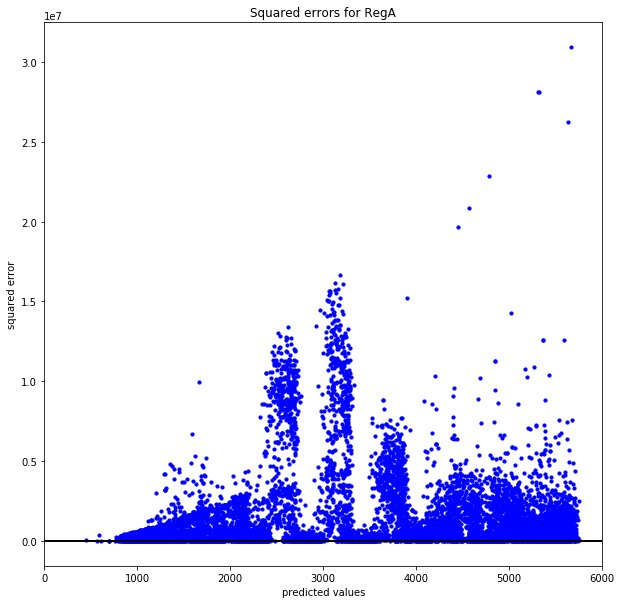

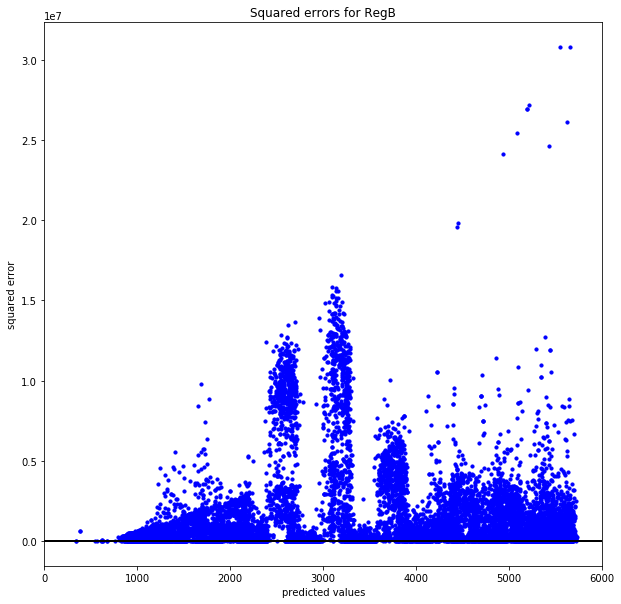

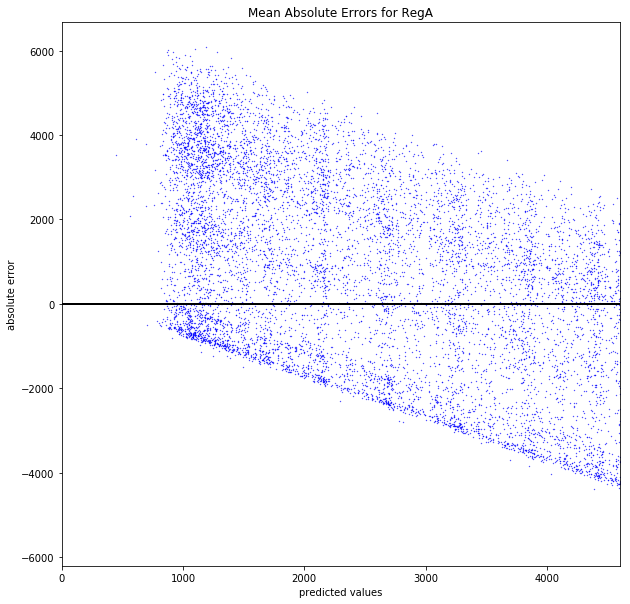

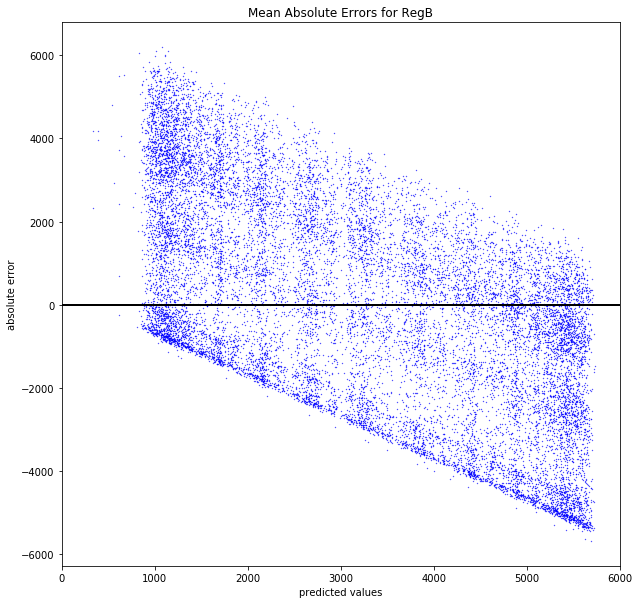

In [91]:
# Your code:
print("Mean squared error for RegA: %.2f" % mean_squared_error(Ya, ya_predict))
print("Mean absolute error for RegA: %.2f" % mean_absolute_error(Ya, ya_predict))
print("Median absolute error for RegA: %.2f" % median_absolute_error(Ya,ya_predict), "\n")



print("Mean squared error for RegB: %.2f" % mean_squared_error(Yb, yb_predict))
print("Mean absolute error for RegB: %.2f" % mean_absolute_error(Yb, yb_predict))
print("Median absolute error for RegB: %.2f" % median_absolute_error(Yb,yb_predict), "\n")



plt.figure(figsize=(10,10))
plt.scatter(ya_predict, (RegA['population_density'][:len(ya_predict)] - ya_predict) ** 2, color = "blue", s = 10,) 
plt.title("Squared errors for RegA") 
plt.hlines(y = 0, xmin = 0, xmax = 6000, linewidth = 2)
plt.xlim((0,6000))
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(yb_predict, (RegB['population_density'][:len(yb_predict)] - yb_predict) ** 2, color = "blue", s = 10,) 
plt.title("Squared errors for RegB") 
plt.hlines(y = 0, xmin = 0, xmax = 6000, linewidth = 2)
plt.xlim((0,6000))
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(ya_predict, (q3_data['population_density'][:len(ya_predict)] - ya_predict), color = "blue", s = 0.1,) 
plt.title("Mean Absolute Errors for RegA")
plt.hlines(y = 0, xmin = 0, xmax = 6000, linewidth = 2)
plt.xlim((0, 4600))
plt.xlabel('predicted values')
plt.ylabel('absolute error')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(yb_predict, (q3_data['population_density'][:len(yb_predict)] - yb_predict), color = "blue", s = 0.1,) 
plt.title("Mean Absolute Errors for RegB")
plt.hlines(y = 0, xmin = 0, xmax = 6000, linewidth = 2)
plt.xlim((0, 6000))
plt.xlabel('predicted values')
plt.ylabel('absolute error')
plt.show()



   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:

The stratified model (RegA) model is better, but the difference isn't that big. The reason for this is that, even though I choosed the most correlated feature to the target, it ('date_time') still had only 0.35 correlation score.

I think that in order to get better results, I should change the 'holiday' feature not by one hot encoding, but by introducing new feature - 'holiday_special'. This feature would have only 0 or 1 value depending on whether it was a holiday on that day or not.


## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [1]:
# Your code:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
dataSVM=pd.read_csv('population_density_categorical.csv')
del dataSVM['weather_type'],dataSVM['weather_type_details'],dataSVM['population_density']

dataSVM["date_time"] = dataSVM["date_time"].transform(lambda x: int(x.split(" ")[1].split(":")[0]))


   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [2]:
# Your code:
#encoding population_density_categorical
dataSVM.population_density_categorical.unique()
#to działa tylko odkodować po wykonaniu!
cleanup_pop = {'population_density_categorical': {'very low': 0, 'low': 1, "medium": 2, "high": 3, "very high": 4}}
dataSVM.replace(cleanup_pop, inplace=True)

#encoding holiday
dataSVM = pd.get_dummies(dataSVM, columns = ["holiday"])


Explanation:

population_density_categorical - it has to be changed because it is categorical value. I encode it into numerical values using label encoding - very low -> 0, low -> 1,......, very high -> 4. It can be done here this way because the categorical values here are in logical order (from "very low" to "very high", so I can give them "rankings".

holiday - in order to change it from categorical to continous, I'll use get_dummies function which make the categorical variable into a series of dichotomous variables (they can have only 1 or 0 as a value).


   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [3]:
# Your code:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = dataSVM.drop(['population_density_categorical'], axis='columns')
y = dataSVM.population_density_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#X_train.info()

X_train.to_csv('svmTrain.csv',index=False)
X_test.to_csv('svmTest.csv',index=False)


Explanation:

I decided to split data using this ratio in order to have training set big enough to be representative, but not too big to avoid very long time required to train SVMs.

   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [9]:
# Your code:
classifier1 = SVC(C=120, kernel='linear')
classifier1.fit(X_train, y_train)

classifier2 = SVC(C=1, kernel='linear')
classifier2.fit(X_train, y_train)

classifier3 = SVC(C=1, kernel='rbf')
classifier3.fit(X_train,y_train)


C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [11]:
# Your code:
from sklearn.metrics import classification_report
pred1 = classifier1.predict(X_test)
pred2 = classifier2.predict(X_test)
pred3 = classifier3.predict(X_test)

print("Results for linear kernel and C=120")
print('Accuracy:', classifier1.score(X_test,y_test),)
print('Classification Report: \n', classification_report(y_test, pred1), '\n') 

print("Results for linear kernel and C=1")
print('Accuracy:', classifier2.score(X_test,y_test),)
print('Classification Report: \n', classification_report(y_test, pred2), '\n')

print("Results for rbf kernel and C=1")
print('Accuracy:', classifier3.score(X_test,y_test),)
print('Classification Report: \n', classification_report(y_test, pred3), '\n')


Results for linear kernel and C=120
Accuracy: 0.5563153042409342
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.87      0.74      3584
           1       0.43      0.31      0.36      2103
           2       0.37      0.39      0.38      2459
           3       0.62      0.69      0.65      3631
           4       0.00      0.00      0.00      1239

    accuracy                           0.56     13016
   macro avg       0.41      0.45      0.43     13016
weighted avg       0.49      0.56      0.52     13016
 

Results for linear kernel and C=1


C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.5711432083589428
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.87      0.77      3584
           1       0.45      0.32      0.37      2103
           2       0.38      0.39      0.38      2459
           3       0.60      0.74      0.67      3631
           4       0.00      0.00      0.00      1239

    accuracy                           0.57     13016
   macro avg       0.42      0.46      0.44     13016
weighted avg       0.50      0.57      0.53     13016
 

Results for rbf kernel and C=1


C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.6650276582667486
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      3584
           1       0.65      0.49      0.56      2103
           2       0.63      0.36      0.45      2459
           3       0.61      0.79      0.69      3631
           4       0.49      0.56      0.52      1239

    accuracy                           0.67     13016
   macro avg       0.64      0.62      0.61     13016
weighted avg       0.66      0.67      0.65     13016
 



   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:

The RBF kernel is the more suitable for this task, because this data requires creation of non-linear combinations of features in order to uplift samples onto a higher-dimensional feature space. This is what rbf kernel is doing. After that, on this higher-dimensional feature space, a linear decision boundary to separate classes is used.

However the accuracy of SVMs isn't great as it reaches only 0.67 and it was the highest value that I managed to get using various splitting ratio, C parameters and kernels. For this reason, I assume that a reason for low accuracy SVM lays in a dataset itself. Moreover, from the results I can deduce, that C parameter hasn't got big influence on results of SVMs in this case.



## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [12]:
# Your code:
data = pd.read_csv("population_density_categorical.csv")
neural_data = data.head(4000).copy()

display(neural_data.head(2))


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,population_density_categorical
0,None,266.22,0.0,0.0,1,Clear,sky is clear,11/19/2017 2:00,726,very low
1,None,294.36,0.0,0.0,90,Rain,heavy intensity rain,8/16/2017 22:00,2039,low


Explanation:

There are 3 categorical input features: holiday, weather_type and weather_type_details.

holiday is "independant", whereas weather_type_details depends on weather_type. Therfore the two latter have to be looked at together when determining the possible input patterns.


In [13]:
num_holiday = neural_data["holiday"].nunique()

weather_types = neural_data["weather_type"].unique()
num_weather_details = [neural_data[neural_data["weather_type"] == t]["weather_type_details"].nunique() for t in weather_types]
num_weather_details = np.sum(num_weather_details)

num_input_patterns = num_holiday * num_weather_details
print("There are", num_input_patterns, "possible input patterns for the categorical features.")

There are 90 possible input patterns for the categorical features.


   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation:


In [ ]:
# Your code:



   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:

The categorical features have to be changed. As done before, we use one hot encoding for this task. Again, also the time gets converted to represent just the hour of the day as numerical value.

Also we do normalize the input data.

In [14]:
# Your code:
neural_data["date_time"] = neural_data["date_time"].transform(lambda x: int(x.split(" ")[1].split(":")[0]))
neural_data = pd.get_dummies(neural_data, columns=["holiday", "weather_type", "weather_type_details"])

In [15]:
from sklearn.preprocessing import StandardScaler
X = neural_data.drop("population_density_categorical", axis=1)
y = neural_data["population_density_categorical"]
scaler = StandardScaler()
# Fit only to the training data

scaler.fit(X)
X = scaler.transform(X)
X= pd.DataFrame(X)

   (d) Train your network with default hyperparameters and return the parameters.

In [16]:
# Your code:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metric

training_data = neural_data.head(2000)
testing_data = neural_data.tail(2000)
# Training set
X_training = X.head(2000)
y_training = y.head(2000)
# Testing set
X_testing = X.tail(2000)
y_testing = y.tail(2000)

mlp = MLPClassifier()
mlp.fit(X_training, y_training)   
display(mlp.get_params())


C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [17]:
# Your code: (number of hidden layers)
from sklearn.model_selection import GridSearchCV
def grid_accuracy(clf):
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        

mlp = MLPClassifier(random_state=12345, max_iter=1000)
        
parameter_space = {
    'hidden_layer_sizes': [(), (100,), (100,100,), (100,100,100)],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_training, y_training)

print('Best parameters found:\n', clf.best_params_)

# All results
grid_accuracy(clf)


Best parameters found:
 {'hidden_layer_sizes': (100,)}
0.795 (+/-0.026) for {'hidden_layer_sizes': ()}
0.940 (+/-0.018) for {'hidden_layer_sizes': (100,)}
0.936 (+/-0.013) for {'hidden_layer_sizes': (100, 100)}
0.930 (+/-0.007) for {'hidden_layer_sizes': (100, 100, 100)}


The results indicate that we get the best results when using 2 hidden layers. But also with one hidden layer, results look pretty similar in terms of accuracy.

But we will try using less neurons/layer to see if we get the same results then.

In [18]:
parameter_space = {
    'hidden_layer_sizes': [(), (15,), (15,15,), (15,15,15)],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_training, y_training)

print('Best parameters found:\n', clf.best_params_)

# All results
print(grid_accuracy(clf))

Best parameters found:
 {'hidden_layer_sizes': (15, 15)}
0.795 (+/-0.026) for {'hidden_layer_sizes': ()}
0.949 (+/-0.008) for {'hidden_layer_sizes': (15,)}
0.951 (+/-0.008) for {'hidden_layer_sizes': (15, 15)}
0.949 (+/-0.008) for {'hidden_layer_sizes': (15, 15, 15)}
None


With 15 neurons/layer the accuracy still is in favor of 2 hidden layers. Results for 3 hidden layers have improved significantly.

In [19]:
# Your code: (number of nodes in the hidden layer)
parameter_space = {
    'hidden_layer_sizes': [(x, x) for x in range(1,15)]
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_training, y_training)

print('Best parameters found:\n', clf.best_params_)

# All results
print(grid_accuracy(clf))


Best parameters found:
 {'hidden_layer_sizes': (9, 9)}
0.265 (+/-0.000) for {'hidden_layer_sizes': (1, 1)}
0.904 (+/-0.022) for {'hidden_layer_sizes': (2, 2)}
0.934 (+/-0.023) for {'hidden_layer_sizes': (3, 3)}
0.936 (+/-0.018) for {'hidden_layer_sizes': (4, 4)}
0.941 (+/-0.014) for {'hidden_layer_sizes': (5, 5)}
0.954 (+/-0.008) for {'hidden_layer_sizes': (6, 6)}
0.952 (+/-0.008) for {'hidden_layer_sizes': (7, 7)}
0.954 (+/-0.003) for {'hidden_layer_sizes': (8, 8)}
0.956 (+/-0.008) for {'hidden_layer_sizes': (9, 9)}
0.951 (+/-0.011) for {'hidden_layer_sizes': (10, 10)}
0.956 (+/-0.001) for {'hidden_layer_sizes': (11, 11)}
0.949 (+/-0.007) for {'hidden_layer_sizes': (12, 12)}
0.952 (+/-0.012) for {'hidden_layer_sizes': (13, 13)}
0.950 (+/-0.003) for {'hidden_layer_sizes': (14, 14)}
None


In [20]:
# Your code: (optimized network) 
mlp = MLPClassifier(random_state=12345, hidden_layer_sizes=(9,9), max_iter=1000)
mlp.fit(X_training, y_training) 
mlp.score(X_testing, y_testing)


0.964

Explanation:

Based on our optimization tests we have trained a network with two hidden layers of 9 neurons each that achieves an accuracy of ~90% on the test data.


   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [21]:
# Your code: (linear activation function):
mlpL = MLPClassifier(random_state=12345, hidden_layer_sizes=(9,9), max_iter=1000, activation="relu")
mlpL.fit(X_training, y_training) 
print("Accuracy:", mlpL.score(X_testing, y_testing))


Accuracy: 0.964


In [22]:
# Your code: (non-linear activation function):
mlpNL = MLPClassifier(random_state=12345, hidden_layer_sizes=(9,9), max_iter=1000, activation="tanh")
mlpNL.fit(X_training, y_training) 
print("Accuracy:", mlpNL.score(X_testing, y_testing))


Accuracy: 0.965


Explanation:

As linear activation function we use the rectified linear unit function. This was actually also used before as it is the default setting.

As non-linear function we use the tangens hyperbolic.

The tanh works not exactly as well as the relu activation function, but provides comparable accuracy.

## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [26]:
# Your code for the confusion matrices on the training data
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

pr11=mlp.predict(X_training)
print("Set1 - Neural Network with optimized number of hidden layers and nodes - Confusion Matrix on Training Data: \n")
cm11 = confusion_matrix(y_training, pr11)
print(cm11)

pr21=mlpNL.predict(X_training)
print("Set2 - Neural Network with non-linear activation function- Confusion Matrix on Training Data: \n")
cm21 = confusion_matrix(y_training, pr21)
print(cm21,"\n")

pr31=classifier3.predict(X_train) 
print("Set3 - SVM from stratified sampling - Confusion Matrix on Training Data: \n")
cm31 = confusion_matrix(y_train, pr31)
print(cm31,"\n")

Set1 - Neural Network with optimized number of hidden layers and nodes - Confusion Matrix on Training Data: 

[[529   0   0   0   0]
 [  0 337   0   0   0]
 [  0   2 393   0   0]
 [  4   0   0 195   0]
 [  0   0   0   0 540]]
Set2 - Neural Network with non-linear activation function- Confusion Matrix on Training Data: 

[[528   0   1   0   0]
 [  0 336   0   0   1]
 [  0   0 395   0   0]
 [  4   0   0 195   0]
 [  0   1   0   0 539]] 

Set3 - SVM from stratified sampling - Confusion Matrix on Training Data: 

[[7485  345   21  295  132]
 [ 986 2539  430  523  256]
 [ 275  776 2166 2178  326]
 [ 152   39  566 7011  803]
 [  45   22   52 1121 1824]] 



- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [27]:
# Your code for the confusion matrices on the test data
pr12=mlp.predict(X_testing)
print("Set1 - Neural Network with optimized number of hidden layers and nodes - Confusion Matrix on Test Data: \n")
cm12 = confusion_matrix(y_testing, pr12)
print(cm12,"\n")


pr22=mlpNL.predict(X_testing)
print("Set2 - Neural Network with non-linear activation function - Confusion Matrix on Test Data: \n")
cm22 = confusion_matrix(y_testing, pr22)
print(cm22,"\n")

pr32=classifier3.predict(X_test) 
print("Set3 - SVM from stratified sampling - Confusion Matrix on Test Data: \n")
cm32 = confusion_matrix(y_test, pr32)
print(cm32,"\n")


Set1 - Neural Network with optimized number of hidden layers and nodes - Confusion Matrix on Test Data: 

[[543   0  10   6   0]
 [  0 305  11   0  10]
 [  8   5 356   0   0]
 [ 14   0   0 186   0]
 [  2   6   0   0 538]] 

Set2 - Neural Network with non-linear activation function - Confusion Matrix on Test Data: 

[[540   0   8  11   0]
 [  1 309  11   0   5]
 [  7   9 352   1   0]
 [ 11   0   0 189   0]
 [  0   4   0   2 540]] 

Set3 - SVM from stratified sampling - Confusion Matrix on Test Data: 

[[3189  191   17  120   67]
 [ 499 1027  225  218  134]
 [ 120  338  876  996  129]
 [  98   21  254 2870  388]
 [  29    5   22  489  694]] 



- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [36]:
# Your code for precision, recall and F1-scores on the test data
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support

print("Set1 - Neural Network with optimized number of hidden layers and nodes:")
print("Precision: ",cross_val_score(mlp, X_testing, y_testing, scoring='precision_weighted', cv=3))
print("Recall: ",cross_val_score(mlp, X_testing, y_testing, scoring='recall_weighted', cv=3))
print("F1-score: ",cross_val_score(mlp, X_testing, y_testing, scoring='f1_weighted', cv=3),"\n")

print("Set2 - Neural Network with non-linear activation function - Precision, recall and F1-scores on the test data:")
print("Precision: ",cross_val_score(mlpNL, X_testing, y_testing, scoring='precision_weighted', cv=3))
print("Recall: ",cross_val_score(mlpNL, X_testing, y_testing, scoring='recall_weighted', cv=3))
print("F1-score: ",cross_val_score(mlpNL, X_testing, y_testing, scoring='f1_weighted', cv=3),"\n")

print("Set3 - SVM from stratified sampling - Precision, recall and F1-scores on the test data:")
print("Precision: ",cross_val_score(classifier3, X_testing, y_testing, scoring='precision_weighted', cv=3))
print("Recall: ",cross_val_score(classifier3, X_testing, y_testing, scoring='recall_weighted', cv=3))
print("F1-score: ",cross_val_score(classifier3, X_testing, y_testing, scoring='f1_weighted', cv=3),"\n")



Set1 - Neural Network with optimized number of hidden layers and nodes:
Precision:  [0.94708318 0.94965086 0.93907995]
Recall:  [0.94610778 0.94902549 0.93834586]
F1-score:  [0.94632015 0.94907724 0.9384324 ] 

Set2 - Neural Network with non-linear activation function - Precision, recall and F1-scores on the test data:
Precision:  [0.95530521 0.94857545 0.94368082]
Recall:  [0.95508982 0.94752624 0.94285714]
F1-score:  [0.95487525 0.94786712 0.9431206 ] 

Set3 - SVM from stratified sampling - Precision, recall and F1-scores on the test data:


C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Precision:  [0.6627817  0.68405254 0.72344739]


C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

Recall:  [0.7005988  0.70614693 0.70676692]


C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


F1-score:  [0.67019003 0.67207373 0.67790535] 



- Accuracy scores on training and test data (give explicitly the result for each fold)

In [35]:
# Your code for accuracy scores on training and test data
from sklearn.metrics import accuracy_score

print("Set1 - Neural Network with optimized number of hidden layers and nodes - Accuracy score on the training data:")
print(cross_val_score(mlp, X_training, y_training, scoring='accuracy', cv=3),"\n")

print("Set1 - Neural Network with optimized number of hidden layers and nodes - Accuracy score on the test data:")
print(cross_val_score(mlp, X_testing, y_testing, scoring='accuracy', cv=3),"\n")

print("Set2 - Neural Network with non-linear activation function - Accuracy score on the training data:")
print(cross_val_score(mlpNL, X_training, y_training, scoring='accuracy', cv=3),"\n")
print("Set2 - Neural Network with non-linear activation function - Accuracy score on the test data:")
print(cross_val_score(mlpNL, X_testing, y_testing, scoring='accuracy', cv=3),"\n")

print("Set3 - SVM from stratified sampling - Accuracy score on the training data:")
print(cross_val_score(classifier3, X_train, y_train, scoring='accuracy', cv=3),"\n")
print("Set3 - SVM from stratified sampling - Accuracy score on the test data:")
print(cross_val_score(classifier3, X_test, y_test, scoring='accuracy', cv=3),"\n")


Set1 - Neural Network with optimized number of hidden layers and nodes - Accuracy score on the training data:
[0.95216741 0.95345345 0.96090226] 

Set1 - Neural Network with optimized number of hidden layers and nodes - Accuracy score on the test data:
[0.94610778 0.94902549 0.93834586] 

Set2 - Neural Network with non-linear activation function - Accuracy score on the training data:
[0.94618834 0.94594595 0.94135338] 

Set2 - Neural Network with non-linear activation function - Accuracy score on the test data:
[0.95508982 0.94752624 0.94285714] 

Set3 - SVM from stratified sampling - Accuracy score on the training data:


C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.65932438 0.6566884  0.65560166] 

Set3 - SVM from stratified sampling - Accuracy score on the test data:


C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bartek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.63317972 0.64070062 0.62854508] 



In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:

Based on results,the best model in our opinion is Neural Network with non-linear activation function. Although the difference is not that big to the Neural Network with optimized number of hidden layers and nodes. Moreover, in second fold, the Neural Network with optimized number of hidden layers is better in precision, recall, f1-score and accuracy. The SVM and regression results are much worse than those of both Neural Network models.




   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:

If we simply hold a certain percentage of examples as test, it can be compared to preparing 500 questions for exam and giving 400 of them to students to learn and revise, while leaving 100 for exam itself. Although at first, it looks like a good idea, because student would be tested with questions that he has never seen before, there might be an issue. 
The issue would be if 100 questions for exam would include those from topic, that wasn't selected in 400 training set, so the student wasn't prepared for them. By applying cross validation we avoid this issue, because every fold is once a test set, so the student from example would train on every topic and would be tested on every topic.
